In [17]:
import numpy as np
import pandas as pd
import os 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

In [18]:
dataset = pd.read_csv('data_testing/csv/combined/final_dataset/total_final_dataset_combined.csv')

In [19]:
dataset.head()

,area,perimeter,height,width,r_value,g_value,b_value,index,label
0,214.0,314.060546,132,190,220,153,51,13,1
1,243.0,539.364146,132,203,219,125,49,13,1
2,219.5,24.239192,132,261,225,136,77,12,1
3,226.0,372.416302,132,261,223,147,26,10,1
4,220.0,293.260545,132,261,227,152,41,12,1


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3438 entries, 0 to 3437
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       3438 non-null   float64
 1   perimeter  3438 non-null   float64
 2   height     3438 non-null   int64  
 3   width      3438 non-null   int64  
 4   r_value    3438 non-null   int64  
 5   g_value    3438 non-null   int64  
 6   b_value    3438 non-null   int64  
 7   index      3438 non-null   int64  
 8   label      3438 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 241.9 KB


In [21]:
X = dataset[['area','perimeter','height','height','width','r_value','g_value','b_value','index']] #'r_value',
X.head()

,area,perimeter,height,height,width,r_value,g_value,b_value,index
0,214.0,314.060546,132,132,190,220,153,51,13
1,243.0,539.364146,132,132,203,219,125,49,13
2,219.5,24.239192,132,132,261,225,136,77,12
3,226.0,372.416302,132,132,261,223,147,26,10
4,220.0,293.260545,132,132,261,227,152,41,12


In [22]:
y = dataset['label']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

In [24]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [73]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = model1.predict(X_test)

C:\Users\Pranay\miniconda3\envs\cv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [74]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score


# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(model1, open(filename, 'wb'))

AdaBoost Classifier Model Accuracy: 0.3008720930232558


In [75]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  0, 117,   0,   0,   0,   0],
       [  0,  98,   0,   0,   0,   0],
       [  0, 109,   0,   0,   0,   0],
       [  0, 125,   0,   0,   1,   0],
       [  0,   1,   0,   0, 109,   0],
       [  0,   1,   0,   0, 127,   0]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

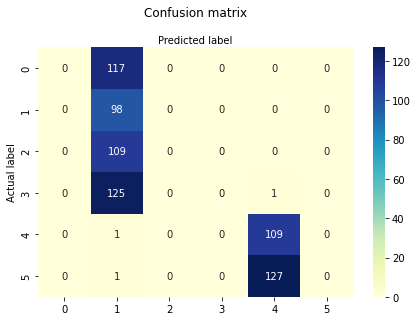

In [76]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [26]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.997093023255814


In [27]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,   0,   0,   0,   0,   0],
       [  0, 114,   0,   0,   0,   0],
       [  0,   0, 123,   0,   0,   0],
       [  0,   0,   1,  95,   0,   0],
       [  0,   0,   0,   0, 124,   0],
       [  0,   0,   0,   0,   1, 113]], dtype=int64)

In [28]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

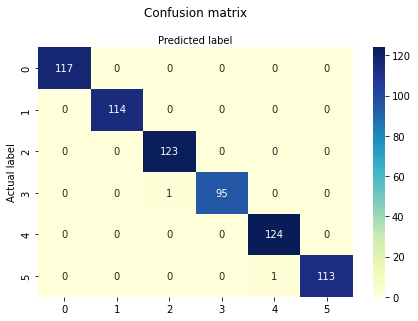

In [29]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [31]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9665697674418605


In [32]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,   0,   0,   0,   0,   0],
       [  3, 110,   1,   0,   0,   0],
       [  0,   6, 112,   5,   0,   0],
       [  0,   0,   5,  91,   0,   0],
       [  0,   0,   0,   0, 124,   0],
       [  0,   0,   0,   0,   3, 111]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

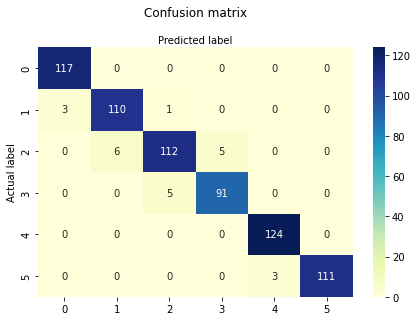

In [33]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')